In [1]:
# hidden
import environment as env
env.initialize()

### Distribución de extremos de la variable predominante y obtención de su valor para un determinado periodo de retorno  

Este ejemplo continuará a partir de los datos temporales de altura de ola $H_s$ guardados al final del apartado [Pretratamiento de series temporales](cl_lectura_pretratamiento_02.ipynb), la serie de picos independientes obtenida en el apartado [Distribución de extremos de la variable predominante: Serie temporal de eventos extremos](cl_regimen_extremal_02.ipynb) y el umbral elegido para el anañisis POT en el apartado [Distribución de extremos de la variable predominante: Serie temporal de picos sobre umbral (POT)](cl_regimen_extremal_03.ipynb). 

Utiliando la serie de eventos extremos y el umbral elegido se ajustan los datos a una función de distribución Generalizada de Pareto y a una función Exponencial utilizando técnicas de remuestreo. Se obtiene la altura significante de ola $H_s$ para una serie de periodos de retorno utilizando los ajustes obtenidos.

Las funciones que se utilizan son:

- clima_maritimo.clima_maritimo.fdist.regimen_extremal.automatico_lmom_boot
- clima_maritimo.graficas.plot_extremal.plot_autom


In [2]:
# imports Anaconda
from __future__ import division
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

# imports ROM 1.1
from clima_maritimo.clima_maritimo.fdist import regimen_extremal
from clima_maritimo.graficas import plot_extremal

dir_data = os.path.join(env.data_path, 'clima')
df = pd.read_pickle(os.path.join(dir_data, 'cadiz_hs_sim_emp.pkl'))        
df_picos = pd.read_pickle(os.path.join(dir_data, 'cadiz_hs_sim_picos.pkl'))
umbral = np.load(os.path.join(dir_data, 'umbral_def_hs_sim_pot.npy'))

tit_pp = 'Hs'
lab_pp = '$H_s$ (m)'

nanios = len(np.unique(df.index.year))

Entradas de usuario:

- Nivel de significancia para las bandas de confianza $alpha$. (0.1 para tener nivel significancia al 95%)
- Tipo de técnica de remuestreo $param$. Se pueden utilizar las opciones 'parametrico' o 'no_parametrico'.
- Método de cálculo de los intervalos de confianza $bca$. Se pueden utilizar las opciones 'estandar' o 'bca'.
- Valores de periodos de retorno a estudiar $tr\_calc$.

In [3]:
alpha = 0.1
param = 'parametrico'
bca = 'estandar'
tr_calc = [5, 200, 500, 750]

Utilizando la serie de eventos extremos y el umbral elegido es posible caracterizar el régimen extremal de la altura de ola significante. Utilizando técnicas de remuestreo se ajustan los datos a una función de distribución Generalizada de Pareto y a una función Exponencial. 

En la figura se presentan los histogramas (paneles superiores) de los parámetros de la GP (en gris) y exponencial (en trazo rojo) obtenidos de la aplicación de la técnica de remuestreo para 10000 casos. En trazo discontinuo azul y rojo se ha representado el valor medio de los parámetros de ambas funciones de distribución. En el panel inferior izquierdo se ha representado la altura de ola significante obtenida, con el intervalo de confianza para periodos de retorno entre 1 y 1000 años, para los ajustes con GP y Exponencial. Por último, el panel inferior derecho, presenta el histograma de altura de ola significante para el periodo de retorno de 1000 años.

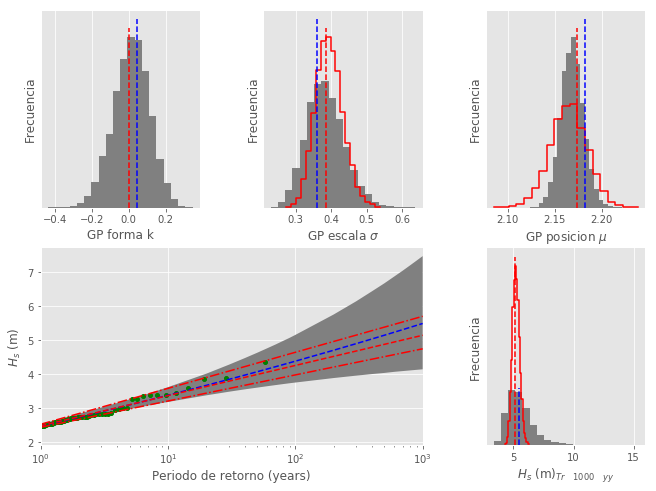

In [4]:
nanios = len(np.unique(df.index.year))

boot_pot, orig_pot, ci_pot, tr_pot, picos_pot, npicos_pot, eventanu_pot = \
                    regimen_extremal.automatico_lmom_boot(df_picos, alpha, umbral, param, bca, nanios)

plot_extremal.plot_autom(boot_pot, orig_pot, ci_pot, tr_pot, picos_pot, npicos_pot, eventanu_pot, 'GP', lab_pp)
plt.show()
                
# Guardar a archivo 'out_pot_ini_hs_sim_ddwns_p90.npy'
out_pot_def = boot_pot, orig_pot, ci_pot, tr_pot, picos_pot, npicos_pot, eventanu_pot
np.save(os.path.join(dir_data, 'out_pot_def_hs_sim.npy'), out_pot_def)

Con este ajuste es posible obtener el valor medio y los intervalos de confianza de la altura de ola signifcante $H_s$ para un valor de periodo de retorno dado $T_R$.

In [5]:
vmed_calc = np.interp(tr_calc, tr_pot, orig_pot[0][0][4:])
ciinf_calc = np.interp(tr_calc, tr_pot, ci_pot[0][0][0, 4:])
cisup_calc = np.interp(tr_calc, tr_pot, ci_pot[0][0][1, 4:])

In [6]:
# definición del df con la salida
df_out = pd.DataFrame({tit_pp: vmed_calc, tit_pp + '_ci_sup': cisup_calc, tit_pp + '_ci_inf': ciinf_calc, 'Tr': tr_calc})

# Guardar html y df
r_ds = os.path.join(env.output_path, 'clima', 'out_reg_extremal__' + tit_pp + '_tr.html')
df_out.to_html(r_ds, sparsify=False)

df_out.to_pickle(os.path.join(dir_data, 'out_reg_extremal__' + tit_pp + '_tr.pkl'))

# Mostrar en pantalla
HTML(filename=r_ds)